In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def layernorm(x):
    """
    This function applies layer normalization to the input tensor x.
    It normalizes the last dimension of x, which is typically the feature dimension.
    """
    # Calculate the mean and standard deviation along the last dimension
    mean = x.mean(dim=-1, keepdim=True)
    std = x.std(dim=-1, keepdim=True)

    # Normalize the input tensor
    normalized_x = (x - mean) / (std + 1e-6)  # Adding a small epsilon to avoid division by zero

    return normalized_x

In [3]:
def generate_tensor(shape, n_extreme_values):
    """
    Generates a tensor with a given shape and introduces extreme values
    """

    # Generate a tensor with random normal values
    x = torch.randn(shape)

    # Generate random indices for extreme values
    extreme_indices = torch.randint(0, x.numel(), (n_extreme_values,))
    
    # Set extreme values to a large number
    x.view(-1)[extreme_indices] *= 20

    # Reshape the tensor back to its original shape
    return x.view(shape)

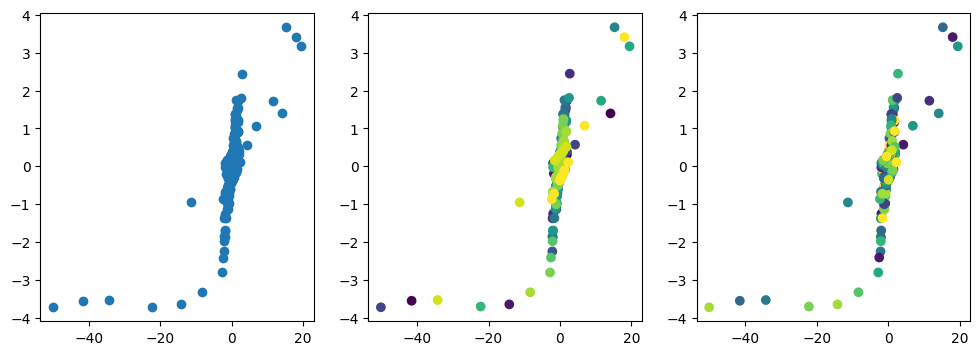

In [4]:
torch.manual_seed(1472)

N = 16
x = generate_tensor((N, N), N)
y = layernorm(x)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
plt.sca(ax1)
plt.plot(x.flatten(), y.flatten(), "o")
plt.sca(ax2)
plt.scatter(x.flatten(), y.flatten(), c=np.repeat(np.arange(N), N))
plt.sca(ax3)
plt.scatter(x.flatten(), y.flatten(), c=np.tile(np.arange(N), N))